# **Challenge 2 Telecom X Parte 2**

## **Importación de librerias**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

## **Lectura datos**

In [76]:
url = 'https://raw.githubusercontent.com/Just-Joelz/Parte-2-Challenge-Telecom-X/refs/heads/main/datos_tratados.csv'
df = pd.read_csv(url)
df.sample(5, random_state=10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas Diarias
5392,7611-YKYTC,No,Male,0,Yes,Yes,22,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),75.0,1573.95,2.500000
1676,2446-ZKVAF,No,Male,0,Yes,No,18,Yes,Yes,DSL,...,No,No,No,No,Month-to-month,No,Credit card (automatic),56.8,1074.65,1.893333
2071,2984-MIIZL,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.8,321.90,2.493333
3353,4795-WRNVT,No,Female,0,No,No,40,Yes,No,DSL,...,No,No,Yes,No,Month-to-month,No,Mailed check,65.1,2586.00,2.170000
6620,9424-CMPOG,No,Male,0,Yes,Yes,9,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.6,197.40,0.653333


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [78]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Cuentas Diarias'],
      dtype='object')

## **Eliminación de Columnas Irrelevantes**

In [79]:
df = df.drop(columns='customerID')
df.head(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## **Decodificando**

In [80]:
for column in df.columns:
  print(f"Unique values in column '{column}': {df[column].unique()}")

Unique values in column 'Churn': ['No' 'Yes']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'SeniorCitizen': [0 1]
Unique values in column 'Partner': ['Yes' 'No']
Unique values in column 'Dependents': ['Yes' 'No']
Unique values in column 'tenure': [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Unique values in column 'PhoneService': ['Yes' 'No']
Unique values in column 'MultipleLines': ['No' 'Yes' 'No phone service']
Unique values in column 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in column 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in column 'TechSupport': ['Yes' 'No' 'No internet service']
U

In [81]:
#Arreglar las columnas con más de 1 valor
col_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in col_replace:
  df[col] = df[col].replace('No internet service', 'No')

df['MultipleLines'].copy().replace({'No phone service': 'No'}, inplace=True)

df.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas Diarias
5484,Yes,Female,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,Yes,Yes,No,Month-to-month,No,Electronic check,40.10,40.10,1.336667
1119,No,Male,1,Yes,No,71,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Credit card (automatic),25.45,1789.65,0.848333
6219,Yes,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,103.40,7372.65,3.446667
3783,No,Male,1,No,No,72,Yes,Yes,No,No,...,No,No,No,No,Two year,Yes,Credit card (automatic),25.10,1789.90,0.836667
6113,No,Male,0,No,Yes,51,Yes,No,DSL,No,...,No,Yes,No,No,One year,No,Credit card (automatic),47.85,2356.75,1.595000


In [82]:
df.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges_Monthly', 'Charges_Total', 'Cuentas Diarias'],
      dtype='object')

In [83]:
#encoding
y = df['Churn']
X = df.drop('Churn', axis=1)

#columnas_categoricas = ['gender', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [84]:
columnas = X.columns
one_hot = make_column_transformer((OneHotEncoder(handle_unknown='ignore', drop='if_binary'), ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']), remainder='passthrough', sparse_threshold=0, force_int_remainder_cols=False)

X = one_hot.fit_transform(X)
X = pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

In [85]:
X.head()

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges_Monthly,remainder__Charges_Total,remainder__Cuentas Diarias
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.6,593.30,2.186667
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.9,542.40,1.996667
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.9,280.85,2.463333
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.0,1237.85,3.266667
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.9,267.40,2.796667


In [86]:
label_encoder = LabelEncoder()

In [87]:
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [88]:
df_encoded = pd.concat([X, pd.DataFrame(y, columns=['Churn'])], axis=1)
df_encoded.sample(5, random_state=10)

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges_Monthly,remainder__Charges_Total,remainder__Cuentas Diarias,Churn
5392,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,22.0,75.0,1573.95,2.500000,0
1676,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,18.0,56.8,1074.65,1.893333,0
2071,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,4.0,74.8,321.90,2.493333,1
3353,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,40.0,65.1,2586.00,2.170000,0
6620,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,19.6,197.40,0.653333,0


In [89]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__gender_Male                              7032 non-null   float64
 1   onehotencoder__SeniorCitizen_1                          7032 non-null   float64
 2   onehotencoder__Partner_Yes                              7032 non-null   float64
 3   onehotencoder__Dependents_Yes                           7032 non-null   float64
 4   onehotencoder__PhoneService_Yes                         7032 non-null   float64
 5   onehotencoder__MultipleLines_No                         7032 non-null   float64
 6   onehotencoder__MultipleLines_No phone service           7032 non-null   float64
 7   onehotencoder__MultipleLines_Yes                        7032 non-null   float64
 8   onehotencoder__InternetService_DSL    

In [90]:
df_encoded.columns = df_encoded.columns.str.replace('onehotencoder__', '').str.replace('remainder__', '')
df_encoded.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,Charges_Monthly,Charges_Total,Cuentas Diarias,Churn
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,9.0,65.6,593.30,2.186667,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,59.9,542.40,1.996667,0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,4.0,73.9,280.85,2.463333,1
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,13.0,98.0,1237.85,3.266667,1
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,3.0,83.9,267.40,2.796667,1


In [91]:
X.columns = X.columns.str.replace('onehotencoder__', '').str.replace('remainder__', '')
X.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,Charges_Monthly,Charges_Total,Cuentas Diarias
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.6,593.30,2.186667
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.9,542.40,1.996667
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.9,280.85,2.463333
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.0,1237.85,3.266667
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.9,267.40,2.796667


## **Visualizacion de correlacion**

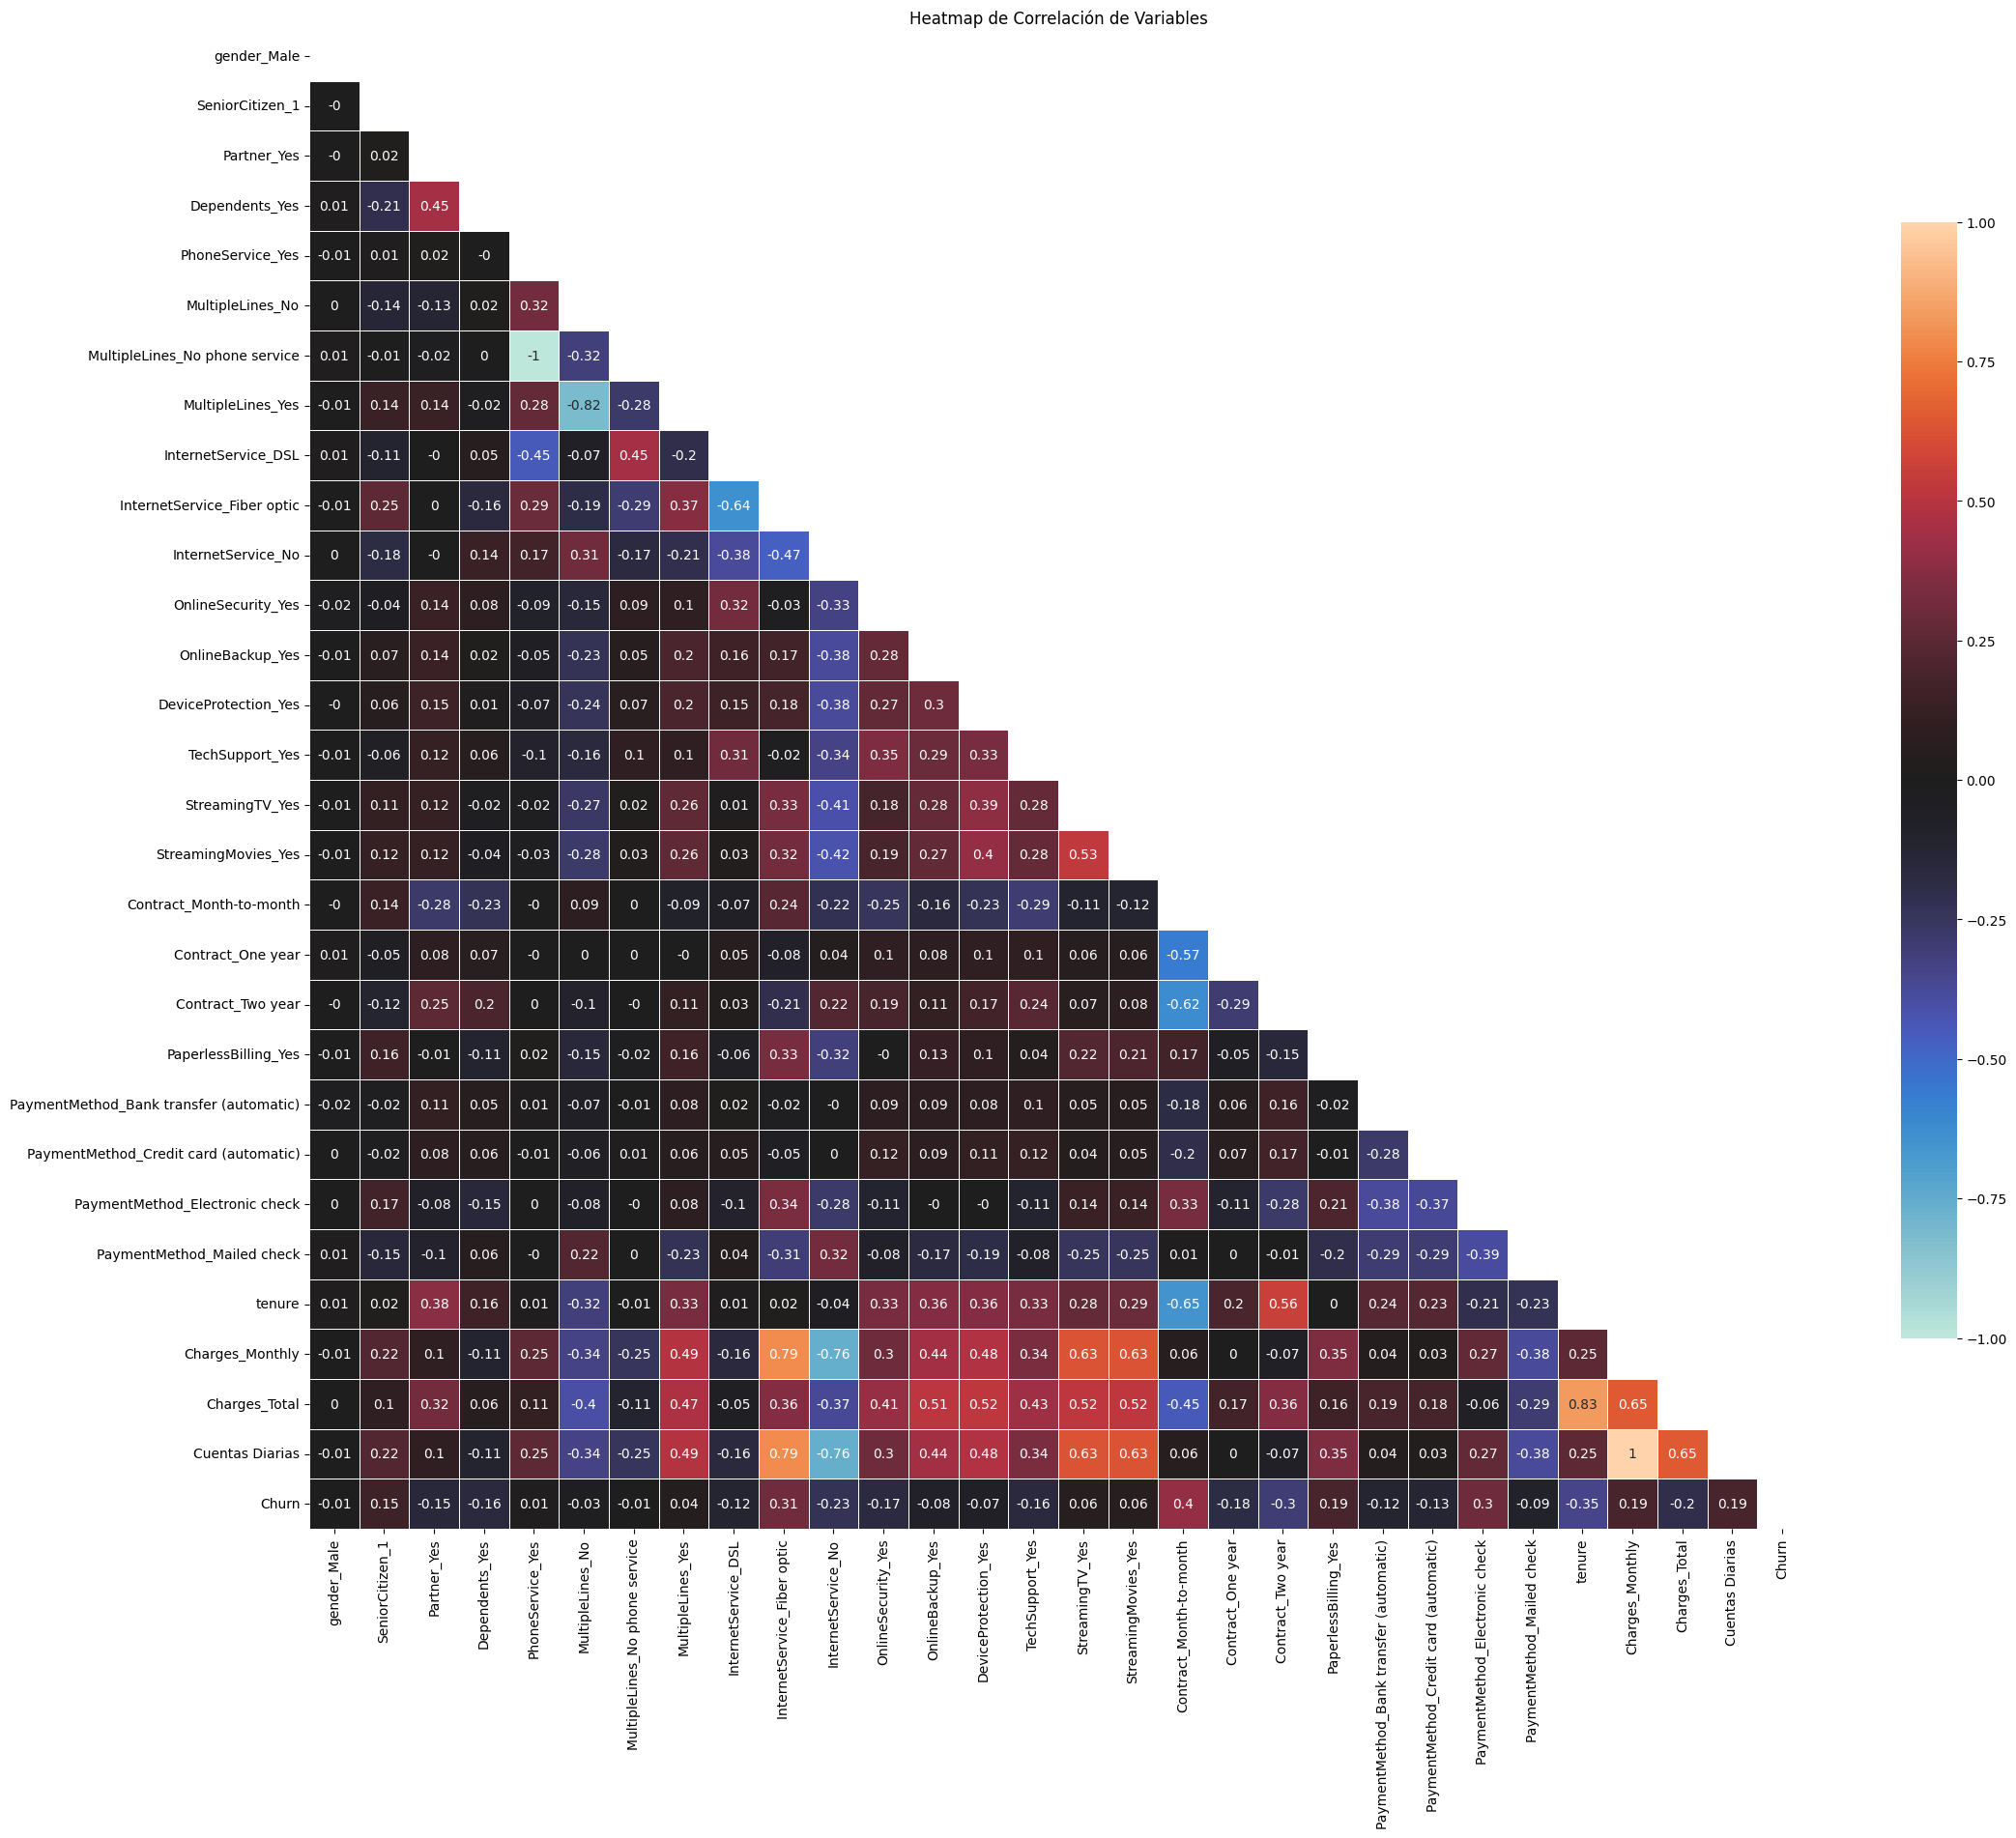

In [92]:
plt.figure(figsize=(25, 30))
mask = np.triu(np.ones_like(df_encoded.corr(), dtype=bool))
sns.heatmap(df_encoded.corr().round(2), mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.title('Heatmap de Correlación de Variables')
plt.show()

In [93]:
#Correlacion con la variable target Churn
df_encoded.corr()['Churn'].abs().sort_values(ascending=False)

,Churn
Churn,1.000000
Contract_Month-to-month,0.404565
tenure,0.354049
InternetService_Fiber optic,0.307463
Contract_Two year,0.301552
PaymentMethod_Electronic check,0.301455
InternetService_No,0.227578
Charges_Total,0.199484
Cuentas Diarias,0.192858
Charges_Monthly,0.192858


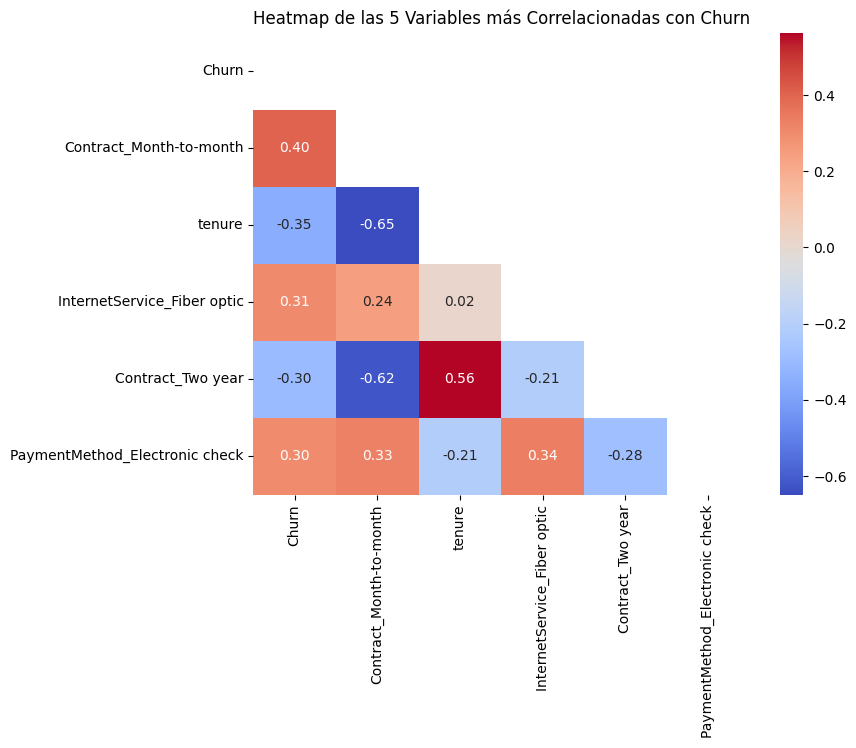

In [94]:
# Ordena los valores
correlations = df_encoded.corr()['Churn'].abs().sort_values(ascending=False)

# Selecciona los primeros 5
top_5_features = correlations.head(6).index.tolist() # Select 6 to include Churn

# Nuevo dataframe con los top
df_top_corr = df_encoded[top_5_features]

# Variable para la matrix
corr_matrix_top = df_top_corr.corr()

# Mascara para el lado simetrico
mask_top = np.triu(np.ones_like(corr_matrix_top, dtype=bool))

# Grafico
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_top, mask=mask_top, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap de las 5 Variables más Correlacionadas con Churn')
plt.show()

## **Analisis Dirigido**

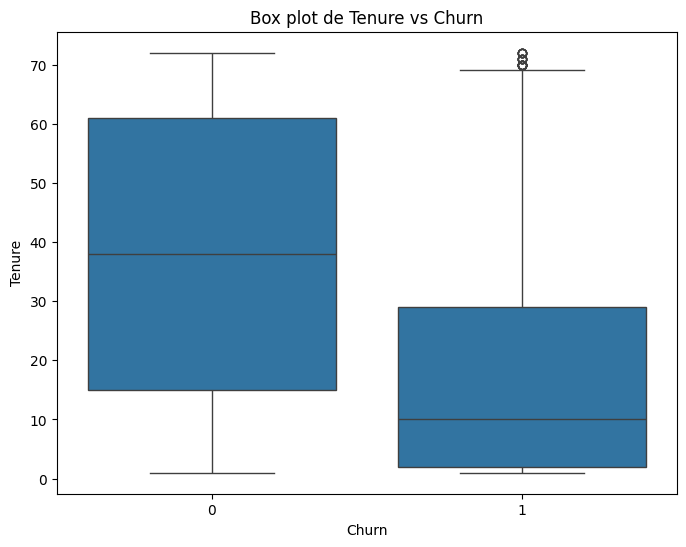

In [95]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_encoded)
plt.title('Box plot de Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

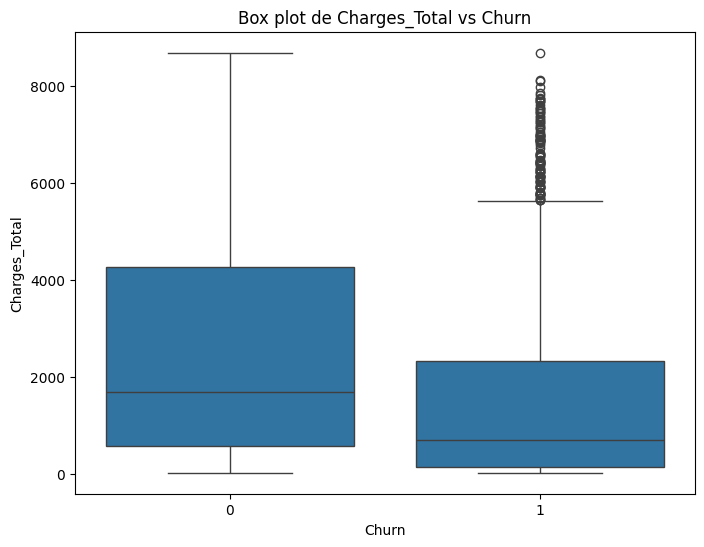

In [96]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges_Total', data=df_encoded)
plt.title('Box plot de Charges_Total vs Churn')
plt.xlabel('Churn')
plt.ylabel('Charges_Total')
plt.show()

## **Creacion Modelos**

### **Separacion datos**

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

### **VIF**

In [98]:
X_const = add_constant(X)

In [99]:
# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
5,PhoneService_Yes,inf
10,InternetService_Fiber optic,inf
9,InternetService_DSL,inf
8,MultipleLines_Yes,inf
7,MultipleLines_No phone service,inf
6,MultipleLines_No,inf
11,InternetService_No,inf
23,PaymentMethod_Credit card (automatic),inf
24,PaymentMethod_Electronic check,inf
25,PaymentMethod_Mailed check,inf


In [100]:
X_final = X_const.drop(columns=['PhoneService_Yes', 'MultipleLines_No phone service', 'InternetService_No', 'Cuentas Diarias','StreamingMovies_Yes', 'MultipleLines_No phone service', 'Contract_Two year', 'Charges_Total', 'PaymentMethod_Mailed check', 'MultipleLines_No', 'InternetService_DSL'])

In [101]:
# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_final.columns
vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
0,const,26.057328
19,Charges_Monthly,12.852349
6,InternetService_Fiber optic,5.872261
12,Contract_Month-to-month,3.385633
18,tenure,2.798894
11,StreamingTV_Yes,2.166458
17,PaymentMethod_Electronic check,2.092218
15,PaymentMethod_Bank transfer (automatic),1.774752
16,PaymentMethod_Credit card (automatic),1.752386
13,Contract_One year,1.682441


In [102]:
X = X_final

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### **Normalizar**

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Balanceo**

In [105]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

## **Modelos**

### **Linear Regresion**

In [106]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7469194312796209
ROC AUC: 0.8357579900320948
Matriz de Confusión:
 [[1137  412]
 [ 122  439]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1549
           1       0.52      0.78      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



### **KNN**

In [107]:
# Instanciar y entrenar
knn = KNeighborsClassifier()
knn.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("K-Nearest Neighbors")
print("Exactitud:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors
Exactitud: 0.7
ROC AUC: 0.7553530597050135
Matriz de Confusión:
 [[1085  464]
 [ 169  392]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      1549
           1       0.46      0.70      0.55       561

    accuracy                           0.70      2110
   macro avg       0.66      0.70      0.66      2110
weighted avg       0.76      0.70      0.72      2110



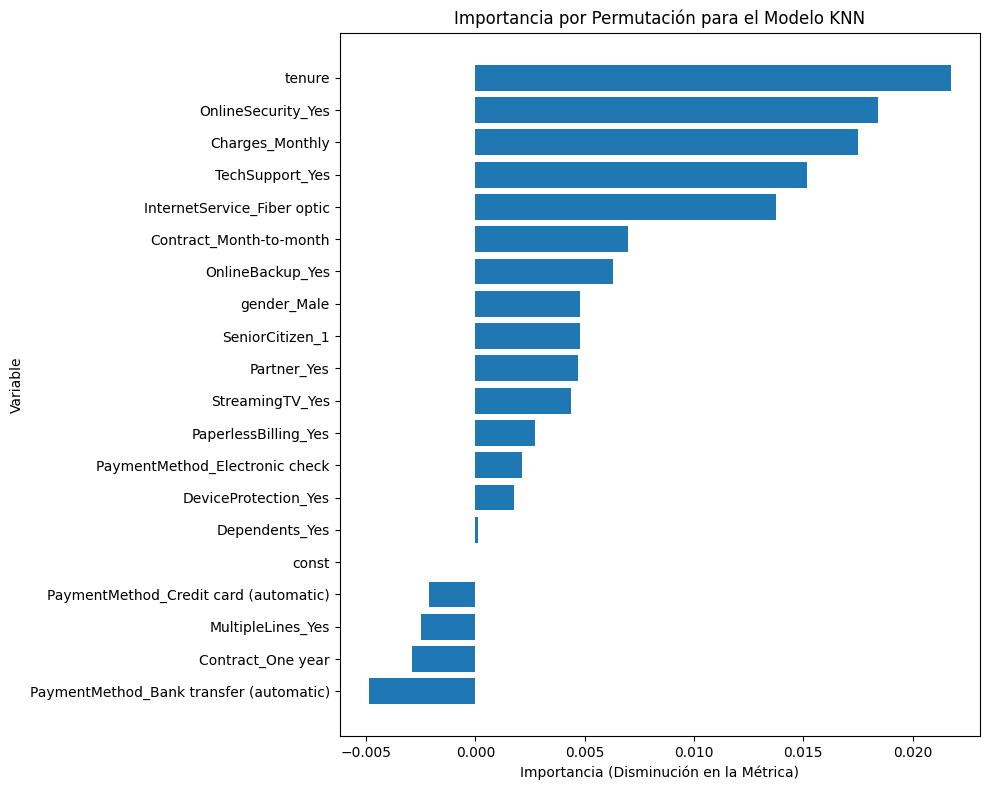

In [108]:
# Calcular la importancia por permutación
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)


# Obtener las medias de importancia y ordenar
sorted_idx = result.importances_mean.argsort()


# Crear un DataFrame para graficar fácilmente
perm_importance_df = pd.DataFrame({
    'Feature': X.columns[sorted_idx],
    'Importance': result.importances_mean[sorted_idx]
})


# Graficar la importancia por permutación
plt.figure(figsize=(10, 8))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.title('Importancia por Permutación para el Modelo KNN')
plt.xlabel('Importancia (Disminución en la Métrica)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

### **Decision Tree**

In [109]:
# Instanciar y entrenar
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Decision Tree")
print("Exactitud:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_prob_dt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree
Exactitud: 0.714218009478673
ROC AUC: 0.6619335802869771
Matriz de Confusión:
 [[1199  350]
 [ 253  308]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1549
           1       0.47      0.55      0.51       561

    accuracy                           0.71      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.71      0.72      2110



### **Random Forest**

In [110]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7739336492890996
ROC AUC: 0.8130206481324851
Matriz de Confusión:
 [[1316  233]
 [ 244  317]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1549
           1       0.58      0.57      0.57       561

    accuracy                           0.77      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.77      0.77      0.77      2110



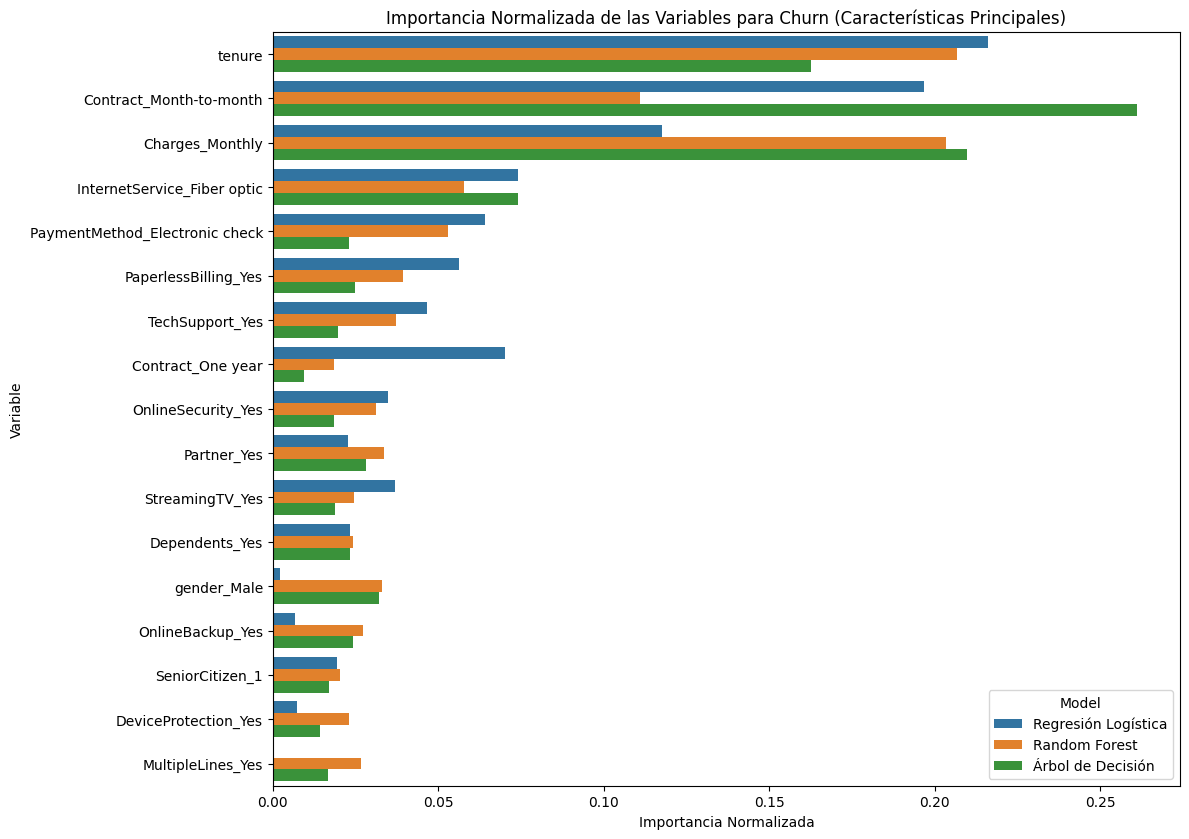

In [111]:
# Obtener coeficientes absolutos de la Regresión Logística
lr_coef = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr.coef_[0]),
    'Model': 'Regresión Logística'
})

# Obtener importancia de las características del Random Forest
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_,
    'Model': 'Random Forest'
})

# Obtener importancia de las características del Decision Tree
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_,
    'Model': 'Árbol de Decisión'
})


# Combinar la importancia de las características de los modelos
combined_importance = pd.concat([lr_coef, rf_importance, dt_importance])

# Normalizar la importancia dentro de cada modelo para comparación
combined_importance['Importance_Normalized'] = combined_importance.groupby('Model')['Importance'].transform(lambda x: x / x.sum())

# Obtener las características principales basadas en la importancia normalizada en los modelos
top_n = 15

top_lr_features = lr_coef.sort_values(by='Importance', ascending=False).head(top_n)['Feature'].tolist()
top_rf_features = rf_importance.sort_values(by='Importance', ascending=False).head(top_n)['Feature'].tolist()
top_dt_features = dt_importance.sort_values(by='Importance', ascending=False).head(top_n)['Feature'].tolist()

# Combinar las listas de características y obtener características únicas
all_top_features = list(set(top_lr_features + top_rf_features + top_dt_features))

# Filtrar el DataFrame de importancia combinada para incluir solo las características principales
filtered_importance = combined_importance[combined_importance['Feature'].isin(all_top_features)]

# Ordenar las características basándose en la importancia normalizada promedio entre los modelos para una mejor visualización
feature_order = filtered_importance.groupby('Feature')['Importance_Normalized'].mean().sort_values(ascending=False).index

# Graficar la importancia combinada de las características
plt.figure(figsize=(12, min(0.5 * len(feature_order), 10))) # Ajustar la altura de la figura según el número de características
sns.barplot(x='Importance_Normalized', y='Feature', hue='Model', data=filtered_importance, order=feature_order)
plt.title('Importancia Normalizada de las Variables para Churn (Características Principales)')
plt.xlabel('Importancia Normalizada')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

## Informe Final: Análisis de Rotación de Clientes en Telecom X

### 1. Resumen del Análisis de Datos

El conjunto de datos contiene información de clientes de Telecom X, incluyendo datos demográficos, servicios contratados y estado de rotación (`Churn`). La variable objetivo, `Churn`, indica si un cliente canceló el servicio.

El análisis exploratorio de datos reveló lo siguiente:

*   **Distribución de Churn:** La variable `Churn` presenta un desbalance, con una mayor cantidad de clientes que no cancelaron el servicio (`No`) en comparación con los que sí lo hicieron (`Yes`). Esto es importante considerarlo al evaluar el rendimiento de los modelos.

*   **Correlaciones:** El heatmap de correlación general mostró diversas relaciones entre las variables. Al enfocarnos en las variables con mayor correlación absoluta con `Churn`, observamos que:
    *   El **tipo de contrato** (`Contract_Month-to-month`, `Contract_Two year`, `Contract_One year`) tiene una fuerte correlación con la rotación. Los clientes con contratos mes a mes muestran una correlación positiva con Churn, lo que sugiere que son más propensos a cancelar, mientras que los contratos a largo plazo (`Two year`, `One year`) tienen una correlación negativa, indicando menor propensión a la rotación.
    *   La **antigüedad del cliente** (`tenure`) muestra una correlación negativa con Churn. Los clientes con mayor antigüedad son menos propensos a cancelar.
    *   El **servicio de Internet de fibra óptica** (`InternetService_Fiber optic`) presenta una correlación positiva con Churn, sugiriendo que los clientes con este servicio podrían ser más propensos a rotar.
    *   El **método de pago de cheques electrónicos** (`PaymentMethod_Electronic check`) también tiene una correlación positiva con Churn.

*   **Análisis Dirigido:**
    *   El box plot de `Tenure` vs `Churn` visualizó que los clientes que rotaron tienden a tener una antigüedad significativamente menor en comparación con los que no rotaron.
    *   El box plot de `Charges_Total` vs `Churn` indicó que los clientes que rotaron tienden a tener cargos totales más bajos, lo cual es coherente con su menor antigüedad.

### 2. Identificación de Variables Clave para la Rotación

El análisis de importancia de las variables de los modelos entrenados nos ayuda a comprender qué factores influyen de manera más significativa en la decisión de un cliente de cancelar el servicio:

*   **Regresión Logística:** Los coeficientes del modelo de Regresión Logística indicaron que el tipo de contrato (`Contract_Month-to-month`, `Contract_Two year`), la antigüedad del cliente (`tenure`), los cargos mensuales (`Charges_Monthly`), el servicio de Internet de fibra óptica (`InternetService_Fiber optic`) y el método de pago (particularmente `PaymentMethod_Electronic check`) fueron las variables más influyentes. Un coeficiente positivo sugiere que un aumento en el valor de la variable incrementa la probabilidad de rotación, mientras que un coeficiente negativo la disminuye.

*   **Random Forest y Árbol de Decisión:** La importancia de las características de estos modelos basados en árboles también resaltó consistentemente la antigüedad (`tenure`), los cargos mensuales (`Charges_Monthly`), el tipo de contrato (`Contract_Month-to-month`, `Contract_Two year`) y el servicio de Internet de fibra óptica (`InternetService_Fiber optic`) como variables clave.

*   **KNN (Importancia por Permutación):** El análisis de importancia por permutación para el modelo KNN también identificó la antigüedad (`tenure`), los cargos mensuales (`Charges_Monthly`) y el servicio de Internet de fibra óptica (`InternetService_Fiber optic`) como variables importantes, aunque la magnitud de la importancia puede variar en comparación con los otros modelos.

En resumen, las variables más significativas a tener en cuenta para entender por qué un cliente podría cancelar el servicio son:

*   **Tipo de Contrato:** Los contratos mes a mes están fuertemente asociados con una mayor rotación, mientras que los contratos a largo plazo reducen la probabilidad de cancelación.
*   **Antigüedad del Cliente (`tenure`):** Los clientes con menos tiempo de servicio son más propensos a rotar.
*   **Cargos Mensuales (`Charges_Monthly`):** Los cargos mensuales más altos tienden a estar asociados con la rotación, especialmente en clientes con servicios de mayor costo como fibra óptica.
*   **Servicio de Internet (Fibra Óptica):** Los clientes con servicio de fibra óptica tienen una mayor propensión a cancelar en comparación con otros tipos de servicio de internet o sin servicio de internet.
*   **Método de Pago (Cheque Electrónico):** El uso de cheques electrónicos como método de pago también parece estar relacionado con una mayor rotación.

### 3. Análisis del Rendimiento de los Modelos

Se entrenaron y evaluaron cuatro modelos para predecir la rotación de clientes: Regresión Logística, K-Nearest Neighbors (KNN), Árbol de Decisión y Random Forest. A continuación, se presenta un resumen de su rendimiento en el conjunto de prueba:

*   **Regresión Logística:**
    *   Exactitud: 0.747
    *   ROC AUC: 0.836
    *   Matriz de Confusión: [[1137, 412], [122, 439]]
    *   Informe de Clasificación: Precisión (Clientes que no cancelan: 0.90, clientes que cancelan: 0.52), Recall (Clientes que no cancelan: 0.73, clientes que cancelan: 0.78), F1-score (Clientes que no cancelan: 0.81, clientes que cancelan: 0.62)

*   **K-Nearest Neighbors (KNN):**
    *   Exactitud: 0.700
    *   ROC AUC: 0.755
    *   Matriz de Confusión: [[1085, 464], [169, 392]]
    *   Informe de Clasificación: Precisión (Clientes que no cancelan: 0.87, clientes que cancelan: 0.46), Recall (Clientes que no cancelan: 0.70, clientes que cancelan: 0.70), F1-score (Clientes que no cancelan: 0.77, clientes que cancelan: 0.55)

*   **Árbol de Decisión:**
    *   Exactitud: 0.714
    *   ROC AUC: 0.662
    *   Matriz de Confusión: [[1199, 350], [253, 308]]
    *   Informe de Clasificación: Precisión (Clientes que no cancelan: 0.83, clientes que cancelan: 0.47), Recall (Clientes que no cancelan: 0.77, clientes que cancelan: 0.55), F1-score (Clientes que no cancelan: 0.80, clientes que cancelan: 0.51)

*   **Random Forest:**
    *   Exactitud: 0.774
    *   ROC AUC: 0.813
    *   Matriz de Confusión: [[1316, 233], [244, 317]]
    *   Informe de Clasificación: Precisión (Clientes que no cancelan: 0.84, clientes que cancelan: 0.58), Recall (Clientes que no cancelan: 0.85, clientes que cancelan: 0.57), F1-score (Clientes que no cancelan: 0.85, clientes que cancelan: 0.57)

Es importante considerar no solo la exactitud general, sino también métricas como ROC AUC, precisión y recall, especialmente dado el desbalance en la variable objetivo. La precisión (precision) indica la proporción de predicciones positivas correctas, mientras que el recall (sensibilidad) indica la proporción de casos positivos reales que fueron identificados correctamente. Para predecir clientes propensos a cancelar, un alto recall en la clase 1 es crucial para minimizar los falsos negativos (clientes que rotarán pero el modelo predice que no).

### 4. Comparación de Modelos y Recomendación

Al comparar el rendimiento de los cuatro modelos, consideramos tanto la exactitud general como métricas más relevantes para conjuntos de datos desbalanceados, como el área bajo la curva ROC (ROC AUC) y el recall para la clase minoritaria (clientes que cancelan).

*   **Exactitud General:** Random Forest tuvo la mayor exactitud (0.774), seguido por Regresión Logística (0.747), Árbol de Decisión (0.714) y KNN (0.700).

*   **ROC AUC:** Regresión Logística obtuvo el mejor ROC AUC (0.836), indicando una buena capacidad para distinguir entre las clases positiva y negativa. Random Forest tuvo un rendimiento ligeramente inferior (0.813), seguido por KNN (0.755) y Árbol de Decisión (0.662). Un ROC AUC más alto es generalmente preferible, especialmente en problemas de clasificación desbalanceados.

*   **Recall (clientes que cancelan):** El recall para la clase "Yes" es crucial para identificar correctamente a los clientes que probablemente cancelarán. Regresión Logística tuvo el recall más alto para la clase 1 (0.78), lo que significa que identificó correctamente al 78% de los clientes que realmente rotaron. KNN también tuvo un recall decente (0.70), mientras que Árbol de Decisión (0.55) y Random Forest (0.57) tuvieron recalls más bajos para la clase minoritaria.

*   **Precisión (clientes que cancelan):** La precisión para la clase "Yes" indica, de las predicciones de rotación, cuántas fueron correctas. Regresión Logística tuvo una precisión del 0.52, KNN 0.46, Árbol de Decisión 0.47 y Random Forest 0.58. Una precisión más alta reduce los falsos positivos (clientes predichos como rotación que en realidad no lo harán).

Considerando la necesidad de identificar a los clientes propensos a cancelar (clientes que cancelan), un alto recall para esta clase es muy importante para minimizar la pérdida de clientes potenciales. Aunque Random Forest tiene la mayor exactitud general y una buena precisión para la clase 1, la Regresión Logística supera a los demás modelos en términos de ROC AUC y, lo que es más importante para este caso de uso, en el recall de la clase minoritaria "Yes". Esto significa que la Regresión Logística es más efectiva para capturar a los clientes que van a rotar.

**Recomendación:**

Basado en el análisis del rendimiento, especialmente en el ROC AUC y el recall para la clase de rotación ("Yes"), el modelo de **Regresión Logística** parece ser el más adecuado para predecir clientes propensos a cancelar el servicio. Aunque su exactitud general es ligeramente menor que la de Random Forest, su capacidad superior para identificar correctamente a los clientes que rotarán (mayor recall) es fundamental para implementar estrategias de retención efectivas. Además, la Regresión Logística ofrece interpretabilidad a través de sus coeficientes, lo que permite entender la dirección e impacto de cada variable en la probabilidad de rotación.

Por lo tanto, se recomienda utilizar el modelo de Regresión Logística para identificar a los clientes con alto riesgo de rotación en Telecom X.